In [1]:
import numpy as np
from scipy.stats import ttest_ind

from src.simulations import IndependentEdge

In [2]:
ie = IndependentEdge(sample_size=100, n_vertices=10, epsilon=0.001, delta=0.05)
x, y = ie._sample()

In [3]:
def cohen_d(x, y):

    mean = np.mean(x) - np.mean(y)
    var = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2.0)
    
    return mean / var

In [4]:
c1 = [2, 4, 7, 3, 7, 35, 8, 9]
c2 = [i * 2 for i in c1]

cohen_d(c1, c2)

-0.5567679522645598

In [5]:
cohen = []

for i in range(10):
    for j in range(10):
        
        xi = x[i, j, :]
        yi = y[i, j, :]
        
        cohen.append(cohen_d(xi, yi))

In [6]:
for est in cohen:
    if np.isnan(est):
        cohen.remove(est)

ValueError: array must not contain infs or NaNs

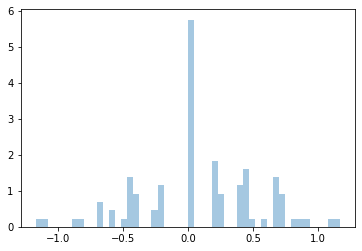

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

ax = sns.distplot(cohen, bins=50)
plt.show()

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

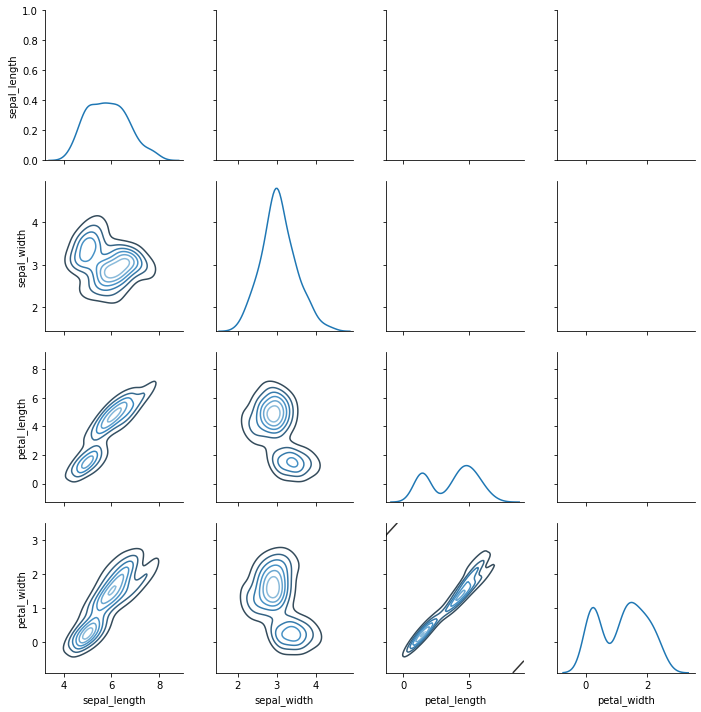

In [19]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, levels=6, cmap="Blues_d")
g.map_upper(plt.scatter, color=iris["species"])